Let's beak it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data(prepare it for the model: scaling and other transformations)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat the baseline)
7. Repeat until satisfied (experiment, experiment, experiment)
8. Extra (using the trained model on custom images)
9. Saving and loading the model

### **1. Import and become one with the data**

The dataset used can be downloaded from my kaggle datasets at [link](https://www.kaggle.com/datasets/patrickduhirwe/10-food-classes).

In [2]:
import os
import zipfile

# Set the Kaggle configuration directory to the current directory
current_dir = os.getcwd()
os.environ['KAGGLE_CONFIG_DIR'] = current_dir

!kaggle datasets download -d patrickduhirwe/10-food-classes

# Unzip our data
zip_ref = zipfile.ZipFile('10-food-classes.zip', 'r')
zip_ref.extractall()
zip_ref.close()



100%|███████████████████████████████████████▊| 489M/491M [00:24<00:00, 25.7MB/s]

100%|████████████████████████████████████████| 491M/491M [00:24<00:00, 21.3MB/s]


In [3]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.

There are 10 directories and 0 images in 10_food_classes_all_data/test.

There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.

There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.

There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.

There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.

There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.

There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.

There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.

There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.

There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.

There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.

There are 10 directori

In [4]:
# Set up the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'

 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


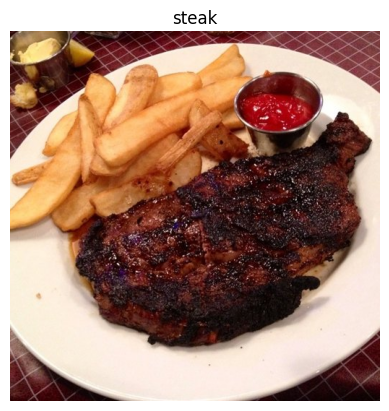

In [6]:
# Visualize, visualize, visualize

# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    """
    Takes in the target folder and class, returns a random image
    """
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read and plot the image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

img = view_random_image(target_dir=train_dir, target_class=np.random.choice(class_names))

### **2. Preprocess the data (prepare it for the model)**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
IMG_SIZE = (224, 224) # Common Image size used in many baseline Image classifiers
train_data = train_datagen.flow_from_directory(train_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

2024-03-11 12:20:32.309868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-03-11 12:20:32.309905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-03-11 12:20:32.354221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

2024-03-11 12:20:32.474909: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

2024-03-11 12:20:33.905501: W tensorflow/compile

Found 7500 images belonging to 10 classes.

Found 2500 images belonging to 10 classes.


### **3. Create a CNN model (baseline)**

My baseline is the model on CNN explainer website (I think it's the Tiny VGG)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation


tf.keras.utils.set_random_seed(42) # for reproducibility

model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

2024-03-11 12:20:36.185296: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
model_1.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 222, 222, 10)      280       

                                                                 

 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       

                                                                 

 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         

 D)                                                              

                                                                 

 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       

                                                                 

 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         

 g2D)                                   

### **4. Fit the model**

In [10]:
history_1 = model_1.fit(train_data,
                         epochs=10,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data)) # You can also do validation_steps=int(0.25 * len(test_data))

Epoch 1/10

235/235 [==============================] - 107s 452ms/step - loss: 2.1712 - accuracy: 0.1968 - val_loss: 2.1036 - val_accuracy: 0.2572

Epoch 2/10

235/235 [==============================] - 104s 442ms/step - loss: 1.8907 - accuracy: 0.3427 - val_loss: 1.8715 - val_accuracy: 0.3424

Epoch 3/10

235/235 [==============================] - 113s 480ms/step - loss: 1.4569 - accuracy: 0.5111 - val_loss: 1.9624 - val_accuracy: 0.3356

Epoch 4/10

235/235 [==============================] - 122s 519ms/step - loss: 0.7713 - accuracy: 0.7533 - val_loss: 2.5777 - val_accuracy: 0.2996

Epoch 5/10

235/235 [==============================] - 116s 494ms/step - loss: 0.2523 - accuracy: 0.9244 - val_loss: 3.3257 - val_accuracy: 0.2928

Epoch 6/10

235/235 [==============================] - 108s 458ms/step - loss: 0.0797 - accuracy: 0.9813 - val_loss: 4.9232 - val_accuracy: 0.2864

Epoch 7/10

235/235 [==============================] - 108s 459ms/step - loss: 0.0254 - accuracy: 0.9943 - val_l

### **5. Evaluate the model**

In [11]:
# Create a dictionary to hold our experiments
exp_dict = {}

# Evaluate model_1
loss, accuracy = model_1.evaluate(test_data)
exp_dict['Model_1'] = [round(accuracy,3)]

79/79 [==============================] - 7s 81ms/step - loss: 6.7867 - accuracy: 0.2536


In [12]:
# Evaluate the model
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

def plot_loss_curves(df):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    epochs = range(len(df["loss"]))
    sns.lineplot(x=epochs, y=df["loss"], label="train loss", ax=axs[0])
    sns.lineplot(x=epochs, y=df["val_loss"], label="val loss", ax=axs[0])
    sns.lineplot(x=epochs, y=df["accuracy"], label="train acc", ax=axs[1])
    sns.lineplot(x=epochs, y=df["val_accuracy"], label="val acc", ax=axs[1])

    plt.tight_layout()
    plt.show()

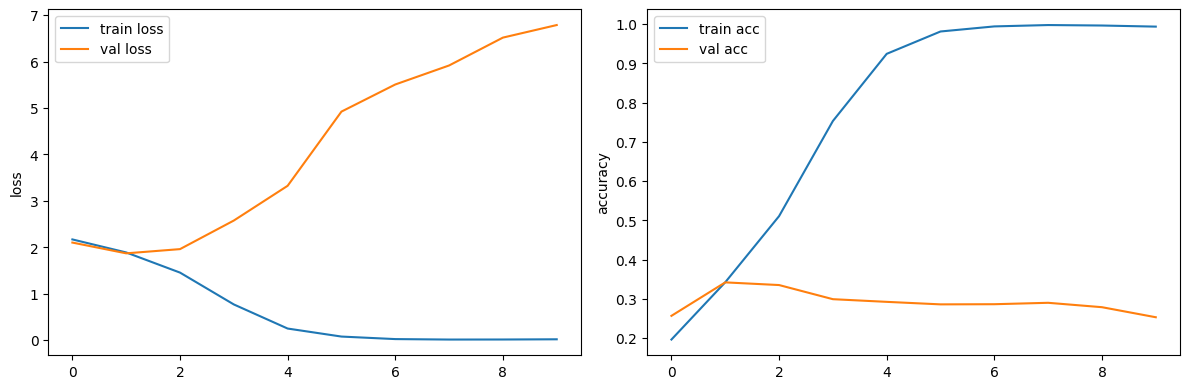

In [13]:
# Plot the loss and accuracy curves
history_1_df = pd.DataFrame(history_1.history)
plot_loss_curves(history_1_df)

Our model is overfitting on the training data. That is, it is getting great results on the training data but fails to generalize on unseed data.

### **6. Adjust different parameters and improve the model (try to beat the baseline)**

From the loss curves, it is eviodent that the model is learning well the patterns in the train data, but fail to generalize on unseed data.</br>
We will do the following:
1. Simplify the model (recuce the layers)
2. Use data augmentation
3. Use transfer learning (not covered in this notebook). I have notebooks on transfer learning on my [Github](https://github.com/duhirwe/projects).

#### **6.1. Reducing overfitting my simplifying the model**

In [14]:
# Let's try to remove 2 convolution layers.
model_2 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       

                                                                 

 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         

 g2D)                                                            

                                                                 

 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       

                                                                 

 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         

 g2D)                                                            

                                                                 

 flatten_1 (Flatten)         (None, 29160)             0         

                                                                 

 dense_1 (Dense)             (None, 10

Well, the number of `Trainable params` did increase. I suspect model_2 will have a similar or worse performance compared to model_1. But let's no jump to conclusions. Remember: Experiment, experiment, experiment!

In [15]:
# Fit the model
history_2 = model_2.fit(train_data,
                         epochs=10,
                         steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=len(test_data)) # You can also do validation_steps=int(0.25 * len(test_data))

Epoch 1/10

235/235 [==============================] - 41s 174ms/step - loss: 2.2191 - accuracy: 0.1979 - val_loss: 2.0501 - val_accuracy: 0.2636

Epoch 2/10

235/235 [==============================] - 37s 158ms/step - loss: 1.8920 - accuracy: 0.3423 - val_loss: 1.9295 - val_accuracy: 0.3156

Epoch 3/10

235/235 [==============================] - 38s 161ms/step - loss: 1.5967 - accuracy: 0.4683 - val_loss: 1.9825 - val_accuracy: 0.2988

Epoch 4/10

235/235 [==============================] - 37s 157ms/step - loss: 1.1069 - accuracy: 0.6497 - val_loss: 2.0868 - val_accuracy: 0.3216

Epoch 5/10

235/235 [==============================] - 38s 162ms/step - loss: 0.6141 - accuracy: 0.8184 - val_loss: 2.4902 - val_accuracy: 0.3172

Epoch 6/10

235/235 [==============================] - 37s 157ms/step - loss: 0.3068 - accuracy: 0.9231 - val_loss: 3.0990 - val_accuracy: 0.3040

Epoch 7/10

235/235 [==============================] - 38s 161ms/step - loss: 0.1391 - accuracy: 0.9733 - val_loss: 3.

In [16]:
# Evaluate model_2
loss, accuracy = model_2.evaluate(test_data)
exp_dict['Model_2'] = [round(accuracy,3)]
exp_dict

79/79 [==============================] - 4s 48ms/step - loss: 4.4654 - accuracy: 0.2996


{'Model_1': [0.254], 'Model_2': [0.3]}

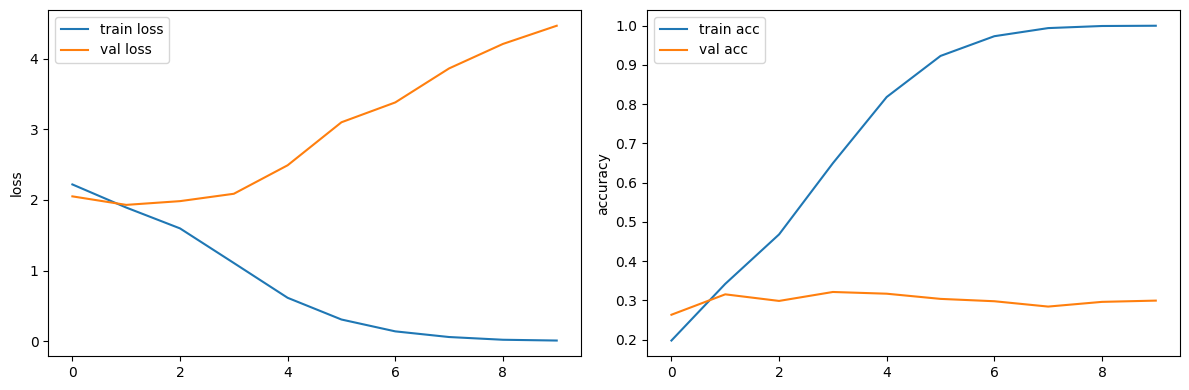

In [17]:
# Plot the loss and accuracy curves
history_2_df = pd.DataFrame(history_2.history)
plot_loss_curves(history_2_df)

Yep! no improvement!

#### **6.2. Reducing overfitting with data augmentation**

In [18]:
# Create ImageDataGenerator with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = IMG_SIZE,
                                                                  batch_size=32,
                                                                  class_mode="categorical",
                                                                  shuffle=True)

# The valid/test data should not augmented. No data leaking.


Found 7500 images belonging to 10 classes.


In [19]:
# Create the model

# model_3 will be a clone of model_1
model_3 = tf.keras.models.clone_model(model_1)

# Compile the clone model
model_3.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


In [20]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                         epochs=10,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/10

235/235 [==============================] - 101s 428ms/step - loss: 2.2607 - accuracy: 0.1405 - val_loss: 2.1847 - val_accuracy: 0.1868

Epoch 2/10

235/235 [==============================] - 101s 428ms/step - loss: 2.1673 - accuracy: 0.2055 - val_loss: 2.0478 - val_accuracy: 0.2680

Epoch 3/10

235/235 [==============================] - 101s 427ms/step - loss: 2.0579 - accuracy: 0.2721 - val_loss: 1.9634 - val_accuracy: 0.2776

Epoch 4/10

235/235 [==============================] - 101s 428ms/step - loss: 1.9597 - accuracy: 0.3164 - val_loss: 1.7805 - val_accuracy: 0.3844

Epoch 5/10

235/235 [==============================] - 101s 428ms/step - loss: 1.9170 - accuracy: 0.3293 - val_loss: 1.8340 - val_accuracy: 0.3680

Epoch 6/10

235/235 [==============================] - 101s 428ms/step - loss: 1.8896 - accuracy: 0.3473 - val_loss: 1.7341 - val_accuracy: 0.4128

Epoch 7/10

235/235 [==============================] - 101s 428ms/step - loss: 1.8478 - accuracy: 0.3592 - val_l

In [21]:
# Evaluate model_3
loss, accuracy = model_3.evaluate(test_data)
exp_dict['Model_3'] = [round(accuracy,3)]
exp_dict

79/79 [==============================] - 5s 59ms/step - loss: 1.6144 - accuracy: 0.4624


{'Model_1': [0.254], 'Model_2': [0.3], 'Model_3': [0.462]}

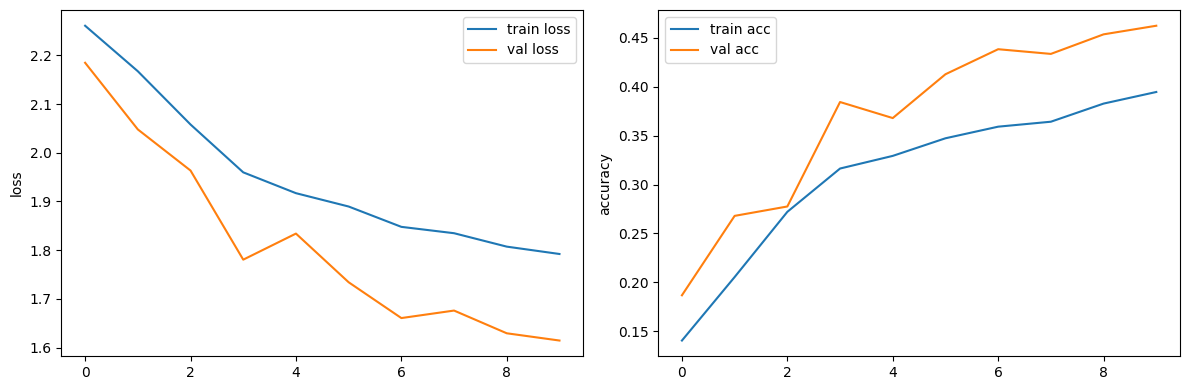

In [22]:
# Plot the loss and accuracy curves
history_3_df = pd.DataFrame(history_3.history)
plot_loss_curves(history_3_df)



### **7. Repeat until satisfied:**
model_3 is learning well, with no overfitting. As the loss curves are still decreasing we could:
- Train for more epochs with early stopping.

Other things we could do are:
- Restructuring the model (increasing the layers, hidden units, etc.)
- Adjust the learning rate.
- Different data augmentation


#### **7.1. Training for longer epochs with early stoping**

In [23]:
# Create the model

# model_4 will be a clone of model_1
model_4 = tf.keras.models.clone_model(model_1)

# Compile the clone model
model_4.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [24]:
# EarlyStopping callback
stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=5, verbose=1, mode='max', restore_best_weights=True)

# Fit the model
history_4 = model_4.fit(train_data_augmented,
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[stop]
                       )

Epoch 1/50

235/235 [==============================] - 102s 429ms/step - loss: 2.2085 - accuracy: 0.1812 - val_loss: 2.0622 - val_accuracy: 0.2340

Epoch 2/50

235/235 [==============================] - 100s 427ms/step - loss: 2.0978 - accuracy: 0.2476 - val_loss: 1.9259 - val_accuracy: 0.3144

Epoch 3/50

235/235 [==============================] - 100s 426ms/step - loss: 2.0285 - accuracy: 0.2781 - val_loss: 1.9366 - val_accuracy: 0.3148

Epoch 4/50

235/235 [==============================] - 100s 427ms/step - loss: 1.9802 - accuracy: 0.3005 - val_loss: 1.8202 - val_accuracy: 0.3848

Epoch 5/50

235/235 [==============================] - 100s 427ms/step - loss: 1.9494 - accuracy: 0.3264 - val_loss: 1.7987 - val_accuracy: 0.3776

Epoch 6/50

235/235 [==============================] - 101s 427ms/step - loss: 1.9070 - accuracy: 0.3489 - val_loss: 1.7555 - val_accuracy: 0.4116

Epoch 7/50

235/235 [==============================] - 101s 428ms/step - loss: 1.8771 - accuracy: 0.3536 - val_l

In [25]:
# Evaluate model_4
loss, accuracy = model_4.evaluate(test_data)
exp_dict['Model_4'] = [round(accuracy,3)]
exp_dict

79/79 [==============================] - 5s 64ms/step - loss: 1.6383 - accuracy: 0.4452


{'Model_1': [0.254], 'Model_2': [0.3], 'Model_3': [0.462], 'Model_4': [0.445]}

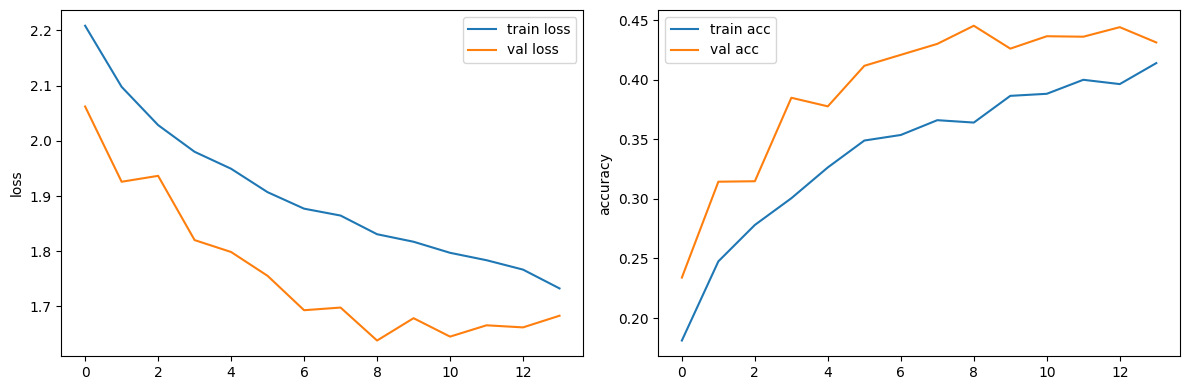

In [26]:
# Plot the loss and accuracy curves
history_4_df = pd.DataFrame(history_4.history)
plot_loss_curves(history_4_df)

### **8. Making predictions with ourt trained model**

In [27]:
# Reminding ourselves which classes we are working with
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [28]:
# Check which model to use
exp_df = pd.DataFrame(exp_dict)
exp_df

,Model_1,Model_2,Model_3,Model_4
0,0.254,0.3,0.462,0.445


I will use model_4 as it has the highest accuracy compared to other models.

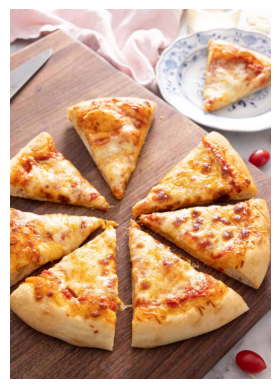

In [29]:
# Downloading the new image from the internet

import requests
from io import BytesIO

# Get the image from the URL
custom_mage = requests.get("https://raw.githubusercontent.com/duhirwe/projects/main/binary_image_classification/Cheese-Pizza-Feature.jpg").content

# Open the image directly from the BytesIO stream without saving it to disk
pizza = mpimg.imread(BytesIO(custom_mage), format='JPG')
plt.imshow(pizza)
plt.axis('off')
plt.show()

In [30]:
# Create a function that gets our image and resizes it so that I can be used with our model

def load_and_process_img(file_name, img_shape=224):
    """
    Reads an image, turns into a tensor and reshapes
    """
    # Decode the image
    img = tf.io.decode_image(file_name)

    # if the image was a file on your computer:
    # img = tf.io.read_file(file_name)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale image
    img = img / 255.

    return img

# This function that makes predictions and plot
def pred_plot(model, file_name, class_names=class_names):
    """
    Gets the image, makes predictions and plot the image with the predicted class as title
    """
    # Get the image
    img  = load_and_process_img(file_name)

    # Make prediction
    pred = model_3.predict(tf.expand_dims(img, axis=0))

    if len(pred[0]) > 1: # If it is a multiclass classification. The softmax outputs an array of probabilites for each class
      pred_class = class_names[tf.argmax(pred[0])]
    else: # if binary classification. The sigmoid outputs only one value
      pred_class = class_names[int(tf.round(pred))]

    # Plot the image
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 100ms/step


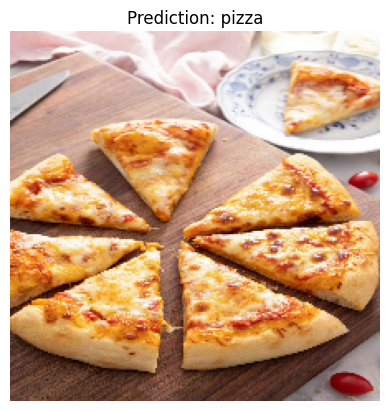

In [31]:
# Test our model on a custom image
pred_plot(model_4, custom_mage)

1/1 [==============================] - 0s 14ms/step


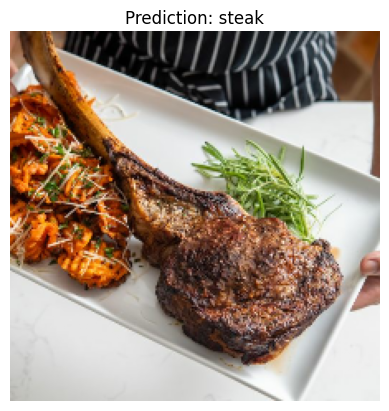

In [32]:
# Let's get a steak image
another_custom_image = requests.get("https://raw.githubusercontent.com/duhirwe/projects/main/binary_image_classification/Tomahawk-image001.jpg").content
pred_plot(model_4, another_custom_image)

### **9. Saving and loading the model**

In [33]:
# Save the model
model_4.save('saved_trained_model_4')

INFO:tensorflow:Assets written to: saved_trained_model_4/assets


INFO:tensorflow:Assets written to: saved_trained_model_4/assets


In [34]:
# Load in a trained model and evaluate it
loaded_model_4 = tf.keras.models.load_model('saved_trained_model_4')
loaded_model_4.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 1.6383 - accuracy: 0.4452


[1.6382664442062378, 0.44519999623298645]